<a href="https://colab.research.google.com/github/Yuwin2008/Logistic-regresion/blob/main/ProjectC115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
data_to_load=files.upload()

Saving escape_velocity.csv to escape_velocity.csv


In [ ]:
import pandas as pd
import plotly.express as px
df = pd.read_csv("escape_velocity.csv")
Velocity=df["Velocity"].tolist()
Escaped=df["Escaped"].tolist()
fig = px.scatter(x = Velocity, y = Escaped)
fig.show()

In [ ]:
import numpy as np
temperature_array = np.array(Velocity)
melted_array=np.array(Escaped)

m, c = np.polyfit(temperature_array, melted_array,1)

y=[]
for x in temperature_array:
  y_value=m*x+c
  y.append(y_value)

fig=px.scatter(x=temperature_array, y=melted_array)
fig.update_layout(shapes=[
                          dict(
                               type='line',
                                 y0= min(y),
                                 y1=max(y),
                                 x0= min(temperature_array),
                                 x1= min(temperature_array)
                          )
])
fig.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



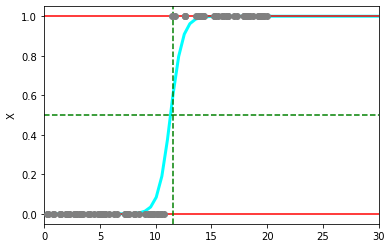

11.557788944723617


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X = np.reshape(Velocity,(len(Velocity),1))
y = np.reshape(Escaped,(len(Escaped),1))

lr=LogisticRegression()
lr.fit(X,y)

plt.figure()
plt.scatter(X.ravel(),y,color='grey', zorder=20)

def model(x):
  return 1/(1+np.exp(-x))

X_test=np.linspace(0,100,200)
melting_chances=model(X_test*lr.coef_+lr.intercept_).ravel()

plt.plot(X_test, melting_chances, color='cyan', linewidth=3)
plt.axhline(y=0, color='red', linestyle='-')
plt.axhline(y=1, color='red', linestyle='-')
plt.axhline(y=0.5, color='green', linestyle='--')

plt.axvline(x=X_test[23], color='green', linestyle='--')

plt.ylabel('y')
plt.ylabel('X')
plt.xlim(0,30)
plt.show()
print(X_test[23])